# Simulación en Python del experimento de la doble rendija

## Librería a utilizar:

In [8]:
# Librería NumerosComplejosLib.py

import math

def sumaC(m, d):
    return (m[0] + d[0], m[1] + d[1])

def productoC(m ,d):
    posicionX = (m[0]*d[0])-(m[1]*d[1])
    posicionY = (m[0]*d[1])+(d[0]*m[1])
    return (posicionX, posicionY)

def restaC(m, d):
    return (m[0]-d[0], m[1]-d[1])

def divisionC(m, d):
    denominador = (d[0]**2) + (d[1]**2)
    pReal = ((m[0]*d[0]) + (m[1]*d[1]))/denominador
    pImg = ((d[0]*m[1])-(m[0]*d[1]))/denominador
    return (pReal, pImg)

def moduloC(num):
    a = num[0]**2
    b = num[1]**2
    return math.sqrt(a+b)

def conjugadoC(num):
    return (num[0], num[1]*-1)

def faseC(num):
    fase = math.atan2(num[1],num[0])
    return fase

def representacionPolarC(num):
    return moduloC(num),faseC(num)

def representacionCartesianaC(num):
    a = num[0]*math.cos(num[1])
    b = num[0]*math.sin(num[1])
    return a, b


## Simulación

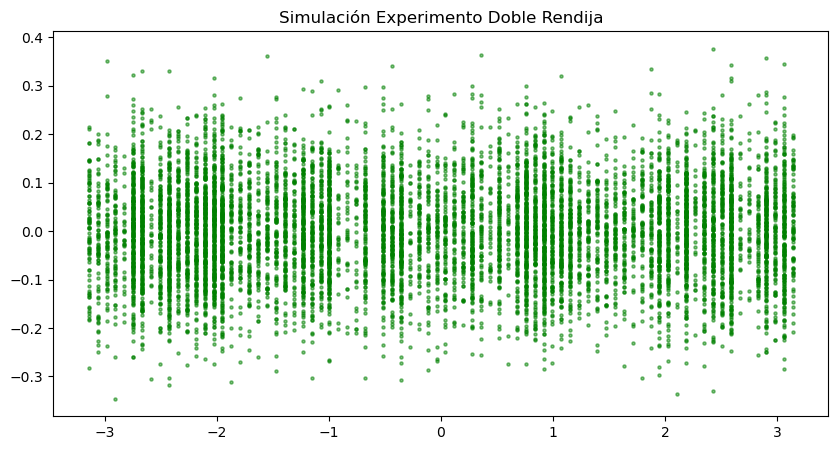

In [124]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calcularProbabilidades(amplitud1, amplitud2, posiciones):
    probabilidades = []

    for i in posiciones:
        # Variar la fase de cada rendija según la posición 
        fase1 = (math.cos(i), math.sin(i))
        fase2 = (math.cos(i + math.pi), math.sin(i + math.pi))

        # Calcular la amplitud total de la interferencia en el punto
        interferencia1 = productoC(amplitud1, fase1)
        interferencia2 = productoC(amplitud2, fase2)
        amplitudTotal = sumaC(interferencia1, interferencia2)

        # Calcular la probabilidad (módulo al cuadrado de la amplitud)
        probabilidad = moduloC(amplitudTotal)**2
        probabilidades.append(probabilidad)

    # Las probabilidades deben sumar 1
    probabilidades = np.array(probabilidades)
    probabilidades /= np.sum(probabilidades)  # Normalizar para que sumen 1

    return probabilidades

def generarParticulas(probabilidades, posiciones, numParticulas):
    # Definir las listas de las posiciones X y Y de las partículas generadas (en base a las probabilidades)
    particulasX = []
    particulasY = []
    # Para cada posición hay que añadir partículas en proporción a la probabilidad que hay
    for i in range(len(posiciones)):
        numParticulasPunto = int(probabilidades[i] * numParticulas)
        particulasX.extend([posiciones[i]] * numParticulasPunto)
        particulasY.extend(np.random.normal(0, 0.1, numParticulasPunto)) 

    return particulasX, particulasY

def graficarParticulas(particulasX, particulasY):
    plt.figure(figsize=(10, 5))
    plt.scatter(particulasX, particulasY, s=5, color="green", alpha=0.5)
    plt.title("Simulación Experimento Doble Rendija")
    plt.grid(False)
    plt.show()

def dobleRendija():
    # Definir la lista de posiciones
    posiciones = np.linspace(-math.pi, math.pi, 80)

    # Las amplitudes de probabilidad para las dos rendijas (números complejos en el plano cartesiano)
    amplitud1 = (1/math.sqrt(2), 0)
    amplitud2 = (1/math.sqrt(2), 0)

    # Calcular probabilidades de interferencia en la pantalla
    probabilidades = calcularProbabilidades(amplitud1, amplitud2, posiciones)

    # Generar las posiciones de las partículas (fotones o electrones)
    particulasX, particulasY = generarParticulas(probabilidades, posiciones, 10000)

    # Graficar las partículas
    graficarParticulas(particulasX, particulasY)

dobleRendija()
